# Titanic Dataset

In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived is a binary feature with 0 or 1
- On average ~38% of passengers survived
- Average age was ~30 years old
- Very few elderly people onboard

In [72]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Van Impe, Miss. Catharina",male,1601,G6,S
freq,1,577,7,4,644


- Everyone had a unique name
- The majority of passengers were male
- Duplication or sharing of cabins
- 3 locations where passengers embarked with S being the most frequently occuring

In [73]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [74]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


So it seems that both the sex of a passenger and their class affected their chances of survival with females surviving almost 75% of the time compared to 19% for males and 1st class passengers having a survival rate of around 63% compared to 47% and 24% for 2nd and 3rd class respectfully.

In [75]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [76]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


On the other hand, it seems like the number of family members aboard a passenger had did not significantly affect their chances of survival an so may not be a useful feature for model development.

Next I'm going to try find if there is a correlation between age group and survival.
For the age groups in years I will be basing it on these ranges:

| 0-14  	| Child       	|
|-------	|:-------------:|
| 15-24 	| Youth       	|
| 25-44 	| Young Adult 	|
| 45-64 	| Adult       	|
| 65+   	| Elder       	|

In [77]:
bins= [0, 14, 24, 44, 64, 150]
labels = ["Child","Youth","Young Adult","Adult","Elder"]
train_df["Age Group"] = pd.cut(train_df["Age"], bins=bins, labels=labels, right=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [78]:
train_df.groupby("Age Group").mean()[["Survived"]]

,Survived
Age Group,
Child,0.584416
Youth,0.365000
Young Adult,0.400621
Adult,0.403846
Elder,0.090909


So it seems like children have a much higher survival rate than other age group with around 58.4% surviving which reinforces the children and woman leave the boat first. Another stat that stands out are the elders who only had around 9.1% of them surviving. This is probably due to their bodies being less than optimal for surviving the sinking. Age could be a feature for the predictive model.

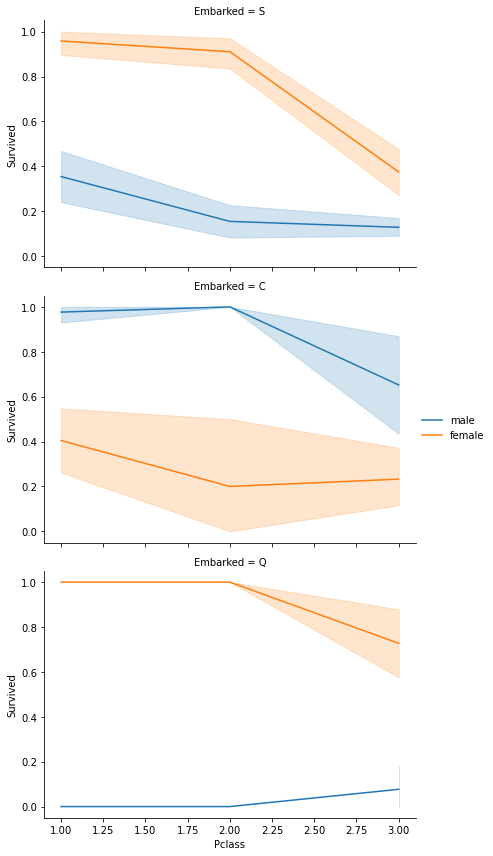

In [79]:
grid = sns.FacetGrid(train_df, row='Embarked', size=4, aspect=1.5)
grid.map(sns.lineplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

- Females had a much higher survival rate
- C port is the exception where had a higher survival rate, may just be a correlation between port and Pclass

I might not use the Embarked feature for the model

In [80]:
train_df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked", "Age Group"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [81]:
test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875


In [82]:
train_df["Sex"] = train_df["Sex"].replace({"male": 0, "female": 1})
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [83]:
test_df["Sex"] = test_df["Sex"].replace({"male": 0, "female": 1})
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,34.5,7.8292
1,893,3,1,47.0,7.0000
2,894,2,0,62.0,9.6875
3,895,3,0,27.0,8.6625
4,896,3,1,22.0,12.2875


In [84]:
train_df["Age"].fillna(train_df["Age"].dropna().median(), inplace=True)

In [85]:
test_df["Age"].fillna(train_df["Age"].dropna().median(), inplace=True)

In [86]:
train_df.loc[train_df["Age"] <= 14, "Age"] = 0
train_df.loc[(14 < train_df["Age"]) & (train_df["Age"] <= 24), "Age"] = 1
train_df.loc[(24 < train_df["Age"]) & (train_df["Age"]<= 45), "Age"] = 2
train_df.loc[(45 < train_df["Age"]) & (train_df["Age"]<= 64), "Age"] = 3
train_df.loc[train_df["Age"] > 64, "Age"] = 4

In [87]:
test_df.loc[test_df["Age"] <= 14, "Age"] = 0
test_df.loc[(14 < test_df["Age"]) & (test_df["Age"] <= 24), "Age"] = 1
test_df.loc[(24 < test_df["Age"]) & (test_df["Age"]<= 45), "Age"] = 2
test_df.loc[(45 < test_df["Age"]) & (test_df["Age"]<= 64), "Age"] = 3
test_df.loc[test_df["Age"] > 64, "Age"] = 4

In [88]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,1.0,7.2500
1,1,1,1,2.0,71.2833
2,1,3,1,2.0,7.9250
3,1,1,1,2.0,53.1000
4,0,3,0,2.0,8.0500


In [89]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,2.0,7.8292
1,893,3,1,3.0,7.0000
2,894,2,0,3.0,9.6875
3,895,3,0,2.0,8.6625
4,896,3,1,1.0,12.2875


In [90]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,2.0,7.8292
1,893,3,1,3.0,7.0000
2,894,2,0,3.0,9.6875
3,895,3,0,2.0,8.6625
4,896,3,1,1.0,12.2875


In [91]:
pd.qcut(train_df["Fare"], 4).cat.categories

IntervalIndex([(-0.001, 7.91], (7.91, 14.454], (14.454, 31.0], (31.0, 512.329]],
              closed='right',
              dtype='interval[float64]')

In [92]:
train_df.loc[train_df["Fare"] <= 7.91, "Fare"] = 0
train_df.loc[(7.91 < train_df["Fare"]) & (train_df["Fare"] <= 14.454), "Fare"] = 1
train_df.loc[(14.454 < train_df["Fare"]) & (train_df["Fare"]<= 31), "Fare"] = 2
train_df.loc[train_df["Fare"] > 31, "Fare"] = 3

In [93]:
test_df.loc[test_df["Fare"] <= 7.91, "Fare"] = 0
test_df.loc[(7.91 < test_df["Fare"]) & (test_df["Fare"] <= 14.454), "Fare"] = 1
test_df.loc[(14.454 < test_df["Fare"]) & (test_df["Fare"]<= 31), "Fare"] = 2
test_df.loc[test_df["Fare"] > 31, "Fare"] = 3

In [94]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,1.0,0.0
1,1,1,1,2.0,3.0
2,1,3,1,2.0,1.0
3,1,1,1,2.0,3.0
4,0,3,0,2.0,1.0


In [95]:
train_df[["Age", "Fare"]] = train_df[["Age", "Fare"]].astype(int)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,1,0
1,1,1,1,2,3
2,1,3,1,2,1
3,1,1,1,2,3
4,0,3,0,2,1
5,0,3,0,2,1
6,0,1,0,3,3
7,0,3,0,0,2
8,1,3,1,2,1
9,1,2,1,0,2


In [96]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,2.0,0.0
1,893,3,1,3.0,0.0
2,894,2,0,3.0,1.0
3,895,3,0,2.0,1.0
4,896,3,1,1.0,1.0


In [97]:
test_df[["Age", "Fare"]] = test_df[["Age", "Fare"]].astype(int)
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,2,0
1,893,3,1,3,0
2,894,2,0,3,1
3,895,3,0,2,1
4,896,3,1,1,1
5,897,3,0,0,1
6,898,3,1,2,0
7,899,2,0,2,2
8,900,3,1,1,0
9,901,3,0,1,2


## Model Building

In [98]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [100]:
num_est = np.array([10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [101]:
%%time
train_scores, test_scores = validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='n_estimators', param_range=num_est, cv=3)

Wall time: 14.7 s


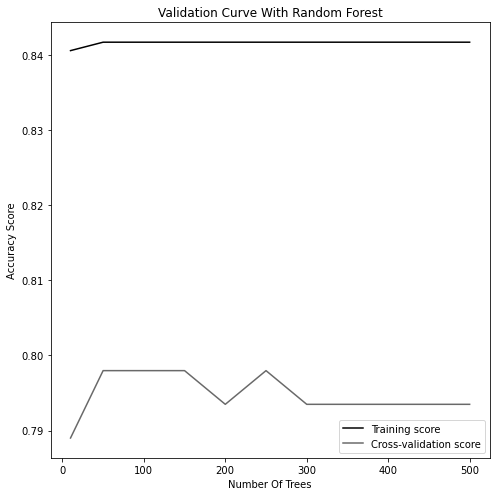

In [102]:
plt.subplots(1, figsize=(7,7))
plt.plot(num_est, train_mean, label="Training score", color="black")
plt.plot(num_est, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [103]:
train_scores

array([[0.85353535, 0.83333333, 0.83164983],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684],
       [0.85521886, 0.83501684, 0.83501684]])

In [104]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y_hat = clf.predict(X_test)
y_hat

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
clf.score(X_train, y_train)

0.8338945005611672

Damn the accuracy isn't that good

In [107]:
predictions = test_df["PassengerId"]

In [108]:
predictions = pd.concat([predictions, pd.Series(y_hat)], axis = 1)
predictions.head()

,PassengerId,0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [110]:
predictions.columns = ["PassengerId", "Survived"]
predictions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [112]:
predictions.to_csv("Submission.csv", index=False)